In [1]:
# importing libraries for data loading and visualization

import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt

pd.options.display.max_rows = 1000

In [2]:
# loading reddit may 2015 comment data from kaggle sql database

sql_conn = sqlite3.connect("data/database.sqlite")

all_comments = pd.read_sql("SELECT author, subreddit, body FROM May2015", sql_conn)

In [3]:
# creating new column for comment length

comment_length = []

for row in all_comments['body']:
    if pd.isnull(row):
        comment_length.append(0)
    else:
        comment_length.append(len(row))
    
all_comments['comment_length'] = comment_length

In [4]:
print("Total comments: ", all_comments.shape[0])
print("Total subreddits: ", all_comments['subreddit'].nunique())
print("Unique authors: ", all_comments['author'].nunique())
print("Average comment length: ", all_comments['comment_length'].mean())

Total comments:  54504410
Total subreddits:  50138
Unique authors:  2611449
Average comment length:  173.75659853945763


In [5]:
# creating subset of comments for r/gameofthrones

sub = ['gameofthrones']

got_comments = all_comments.loc[all_comments['subreddit'].isin(sub)]

print("Total r/gameofthrones comments: ", got_comments.shape[0])
print("Unique r/gameofthrones authors: ", got_comments['author'].nunique())
print("Average r/gameofthrones comment length: ", got_comments['comment_length'].mean())

Total r/gameofthrones comments:  191006
Unique r/gameofthrones authors:  35087
Average r/gameofthrones comment length:  154.33929824194004


In [6]:
# identifying the top 10 authors for modeling, excluding deleted/mod/bot accounts

exclusion_list = [
    '[deleted]',
    'AutoModerator'
]

got_top_10_authors = got_comments['author'].loc[~got_comments['author'].isin(exclusion_list)].value_counts()[:10].index.values

print("Top 10 authors: ", got_top_10_authors)

Top 10 authors:  ['elbruce' 'TheEld' 'kjhatch' 'SawRub' 'JiveTurkey1983' 'kutwijf'
 'DoubleHunter' 'jymhtysy' 'Craftlords' 'havron']


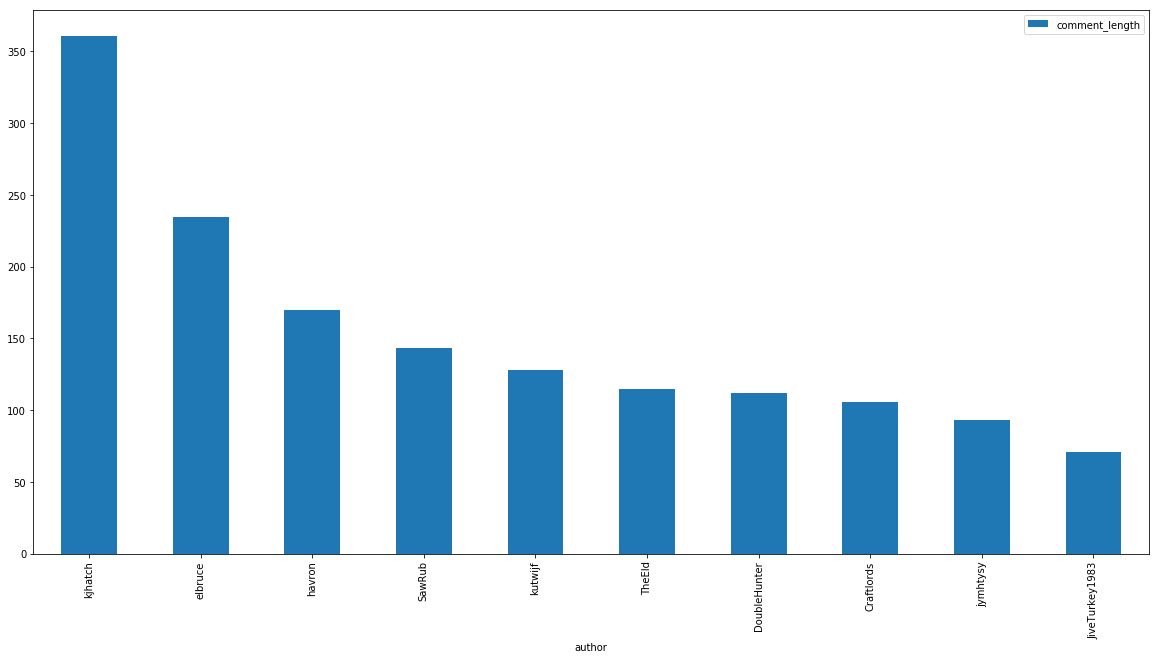

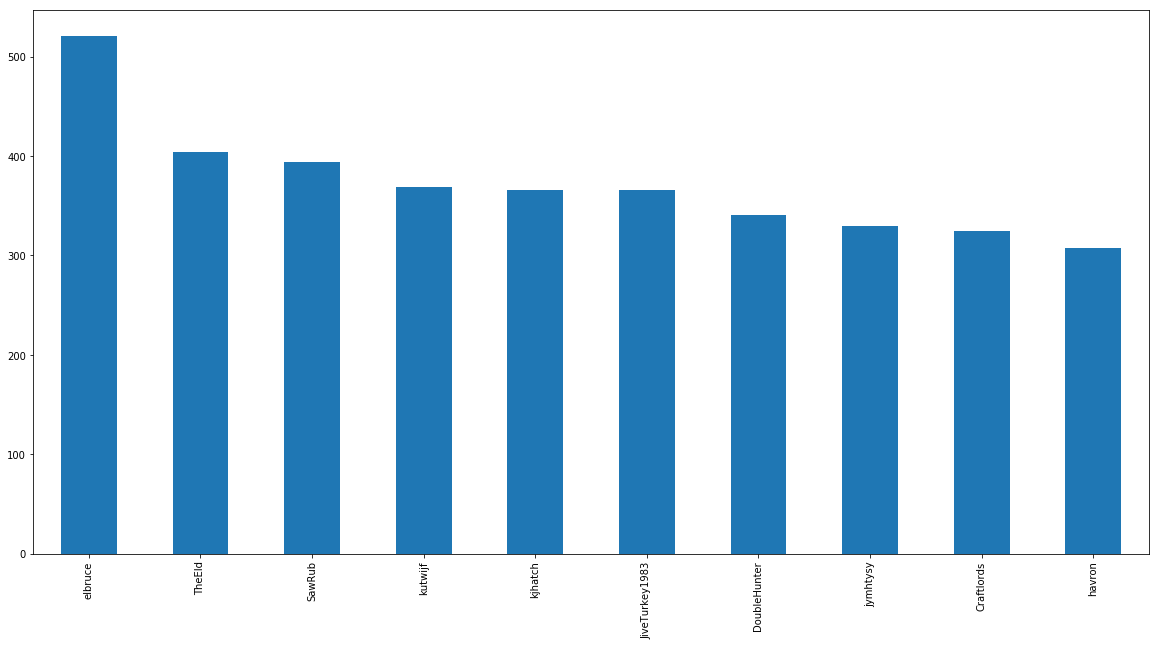

In [7]:
# looking at average comment length and number of comments by author

got_comments_top_10_all = got_comments.loc[got_comments['author'].isin(got_top_10_authors)].drop_duplicates(subset = ["author", "body"])

got_top_comments_length = got_comments_top_10_all.groupby('author', as_index=False)['comment_length'].mean().sort_values('comment_length', ascending = False)
got_top_comments_count = got_comments_top_10_all['author'].value_counts()

plt.figure()
got_top_comments_length.plot.bar(x = 'author', y = 'comment_length', figsize=(20,10))
plt.figure()
got_top_comments_count.plot.bar(x = 'author', y = 'comments', figsize=(20,10))
plt.show()

In [9]:
# sampling comments to get an even number for each author to avoid bias

got_comments_top_10_sampled = got_comments_top_10_all.groupby('author', group_keys=False).apply(lambda got_comments_top_10_all: got_comments_top_10_all.sample(300))
got_comments_top_10_sampled.to_csv('data/got_comments_top_10_sampled.csv', columns = ['author','body'], index = False)